In [2]:
# importando as ferramentas necessarias 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ======================================
#    ETAPA 1 – ENTENDER O NEGÓCIO
#    Visão geral de filiais, cidades
#    e mix de produtos
# ======================================

In [4]:
# Lendo os dadosImportar o dataset
df = pd.read_csv("..//Arquivo_csv//supermarket_sales.csv")

In [5]:
# Visualizar as primeiras linhas para conhecer os dados 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Verificar se existem valores nulos no dataset
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# Criar um agrupamento por filial e cidade (Branch, City) 
agrupar = df.groupby(["Branch", "City"])

# Calcular a média de satisfação (coluna "Rating") por filial
media_satisfacao = agrupar["Rating"].mean()

In [8]:
# Calcular o total de vendas (coluna "Total") por filial e cidade
vendas_totais = agrupar["Total"].sum()

In [9]:
# Calcular a renda bruta total (coluna "gross income") por filial e cidade
lucro_bruto = agrupar["gross income"].sum()

In [10]:
# Calcular a participação percentual de cada filial no total de vendas
total_geral = vendas_totais.sum()
participacao_percentual = (vendas_totais / total_geral) * 100

In [11]:
# Exibir a participação percentual das filiais
participacao_percentual


Branch  City     
A       Yangon       32.882757
B       Mandalay     32.881921
C       Naypyitaw    34.235322
Name: Total, dtype: float64

In [12]:
# calcular o total de vendas por categoria de produto (Product line)
produtos_total = df.groupby("Product line")["Total"].sum()

In [13]:
# Ordenar os produtos do mais vendido para o menos vendido
produtos_ordenados = produtos_total.sort_values(ascending=False)
produtos_ordenados


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [14]:
# ======================================
#    ETAPA 2 – DESEMPENHO FINANCEIRO
#    Resumo financeiro por filial
# ======================================


In [15]:
def resumo_filial(df):
    """
    Cria um resumo financeiro por filial (Branch),
    incluindo receita total, lucro total, número de vendas
    e ticket médio.
    """
    # Agrupa o dataset por filial
    grupo = df.groupby("Branch")
    
    # Calcula a receita total (soma do Total) por filial
    receita = grupo["Total"].sum()
    
    # Calcula o lucro total (soma do gross income) por filial
    lucro = grupo["gross income"].sum()
    
    # Conta o número de vendas (linhas) por filial
    vendas = grupo["Total"].count()
    
    # Calcula o ticket médio (receita total ÷ número de vendas) por filial
    ticket = receita / vendas
    
    # Retorna um DataFrame organizado com todos os indicadores
    return pd.DataFrame({
        "receita_total": receita,
        "lucro_total": lucro,
        "num_vendas": vendas,
        "ticket_medio": ticket
    })

In [16]:
# Chama a função para gerar o resumo financeiro por filial
resumo_filiais = resumo_filial(df)

In [17]:
# Exibe o resumo financeiro das filiais
resumo_filiais

,receita_total,lucro_total,num_vendas,ticket_medio
Branch,,,,
A,106200.3705,5057.1605,340,312.354031
B,106197.6720,5057.0320,332,319.872506
C,110568.7065,5265.1765,328,337.099715


In [18]:
# Indentificando o produto mais rentavel
rentavel = df.groupby("Product line")["gross income"].sum()
rentavel_ordenados = rentavel.sort_values(ascending=False)

# Exibir o mais rentável por produto
rentavel_ordenados

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [19]:
# --------------------------------------
#    Métodos de pagamento
#    (uso e receita gerada)
# --------------------------------------

In [20]:
# Calcular receita total (soma do Total) por método de pagamento
pagamentos = df.groupby("Payment")["Total"].sum()

# Exibir os métodos de pagamento
pagamentos


Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

In [21]:
# Contar número de vendas (transações) por método de pagamento
num_transacoes = df["Payment"].value_counts()
num_transacoes

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [22]:
# ======================================
#    ETAPA 3 – PADRÕES TEMPORAIS
#    Sazonalidade diária, semanal,
#    mensal e horários de pico
# ======================================

In [23]:
# --------------------------------------
#    3.1 Conversão de datas e criação
#        de colunas de tempo
# --------------------------------------

In [24]:
# Converter a coluna "Date" para o formato de data (datetime)
df["Date"] = pd.to_datetime(df['Date'])


In [25]:
# Criando novas colunas Dia Mes Ano e Semanas 

df = df.assign(
    Dia = df["Date"].dt.day,
    Mes = df["Date"].dt.month,
    Ano = df["Date"].dt.year,
    Semana = df["Date"].dt.isocalendar().week,
    Dia_Semana = df["Date"].dt.day_name()  # nome do dia para análise diária
)


In [26]:
# Cria uma coluna com o nome do mês
df["Nome_Mes"] = df["Date"].dt.strftime("%B")

# Agrupa por filial e nome do mês
vendas_mes = df.groupby(["Branch","Mes", "Nome_Mes" ])["Total"].sum()

vendas_mes

Branch  Mes  Nome_Mes
A       1    January     38681.1285
        2    February    29860.1205
        3    March       37659.1215
B       1    January     37176.0585
        2    February    34424.2710
        3    March       34597.3425
C       1    January     40434.6810
        2    February    32934.9825
        3    March       37199.0430
Name: Total, dtype: float64

In [27]:
# --------------------------------------
#    3.2 Vendas por dia, semana e mês
# -------------------------------------

In [28]:
#  Criar relatório de vendas por Semana
# # Agrupar por filial (Branch) e dia da semana, somando o total de vendas
vendas_semana = df.groupby(["Branch", "Semana"])["Total"].sum().reset_index()
vendas_semana

,Branch,Semana,Total
0,A,1,7433.5170
1,A,2,6926.3460
2,A,3,11407.3155
3,A,4,10217.6130
4,A,5,7345.5900
5,A,6,7612.7205
6,A,7,6972.8820
7,A,8,5536.8180
8,A,9,7188.6360
9,A,10,10524.1500


In [29]:
# --------------------------------------
#    3.3 Gráficos de sazonalidade
#        (dia, semana, mês)
# --------------------------------------

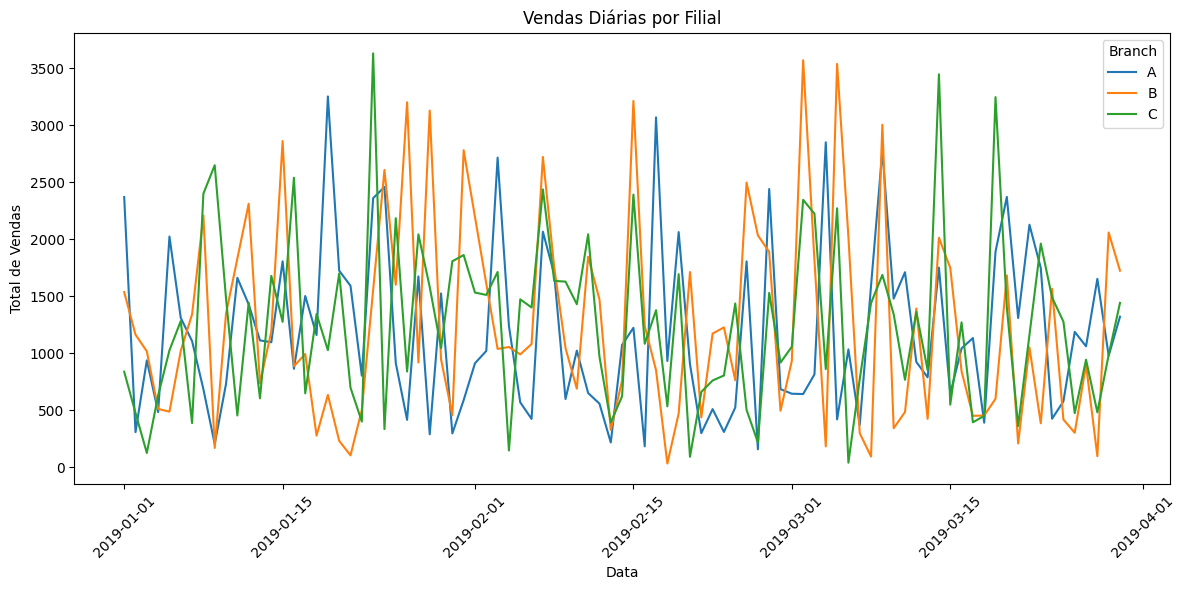

In [30]:
def grafico_vendas_diarias(df):
    """
    Plota a evolução das vendas diárias por filial.
    """
    vendas_dia = (
        df.groupby(["Branch", "Date"])["Total"]
          .sum()
          .reset_index()
    )
    plt.figure(figsize=(12,6))
    sns.lineplot(data=vendas_dia, x="Date", y="Total", hue="Branch")
    plt.title("Vendas Diárias por Filial")
    plt.xlabel("Data")
    plt.ylabel("Total de Vendas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_vendas_diarias(df)

C:\Users\welli\AppData\Local\Temp\ipykernel_6592\2402443939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_mes, x="Mes", y="Total", palette="viridis")


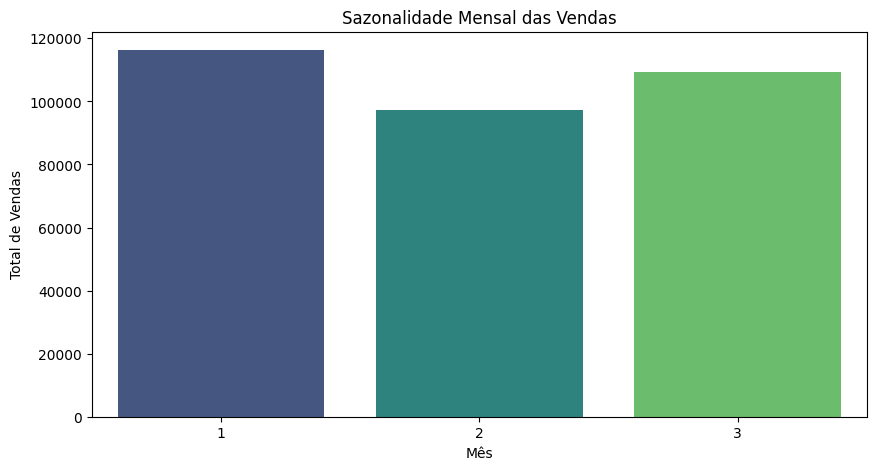

In [31]:

# Sazonalidade Mensal (com graficos)
vendas_mes = df.groupby(["Mes"])["Total"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=vendas_mes, x="Mes", y="Total", palette="viridis")
plt.title("Sazonalidade Mensal das Vendas")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.show()


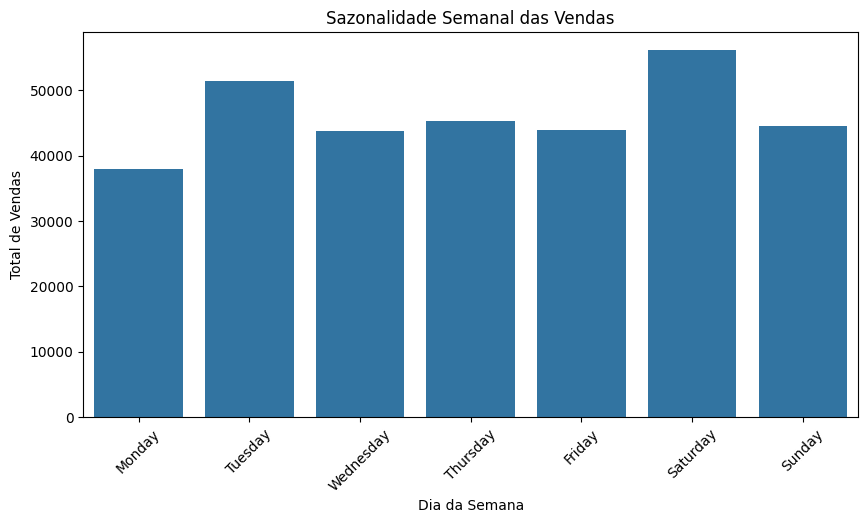

In [32]:
# Ordenando os dias 
dias_ordem = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sazonalidade Semanal (com grafico)
vendas_semana = (
    df.groupby("Dia_Semana")["Total"]
      .sum()
      .reindex(dias_ordem)
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=vendas_semana, x="Dia_Semana", y="Total")
plt.title("Sazonalidade Semanal das Vendas")
plt.xlabel("Dia da Semana")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.show()

In [33]:
# --------------------------------------
#    3.4 Análise de horários (Time)
# --------------------------------------

In [34]:
# garante que a coluna "Time" esteja como string sem espaços estranhos
df["Time"] = df["Time"].astype(str).str.strip()

# converte para tipo datetime 
df["Time_parsed"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce")

# extrai a hora
df["Hour"] = df["Time_parsed"].dt.hour

In [35]:
# checar dtype
print(df["Time"].dtype)
print(df["Time_parsed"].dtype)

# ver valores que não viraram hora corretamente
df[df["Time_parsed"].isna()][["Time"]].head(10)

object
datetime64[ns]


,Time


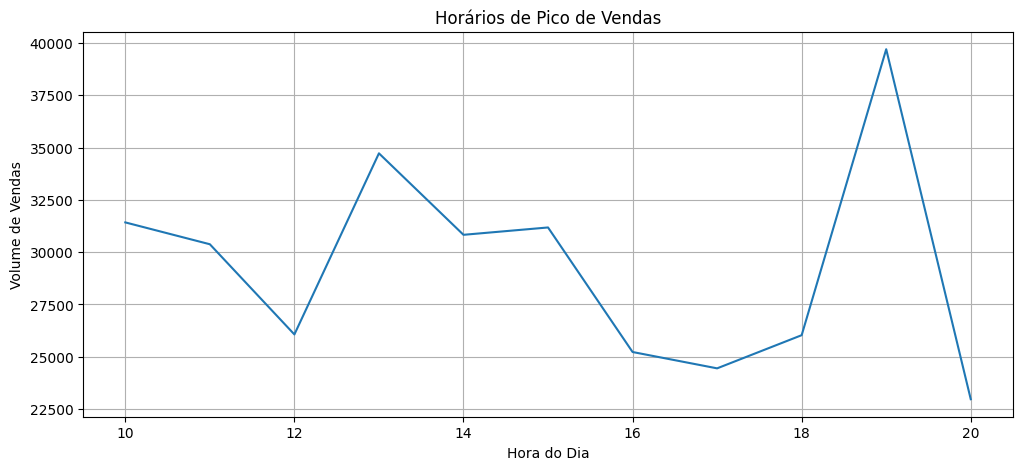

In [36]:
# agrupando vendas por horario

vendas_hora = df.groupby("Hour")["Total"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=vendas_hora, x="Hour", y="Total")
plt.title("Horários de Pico de Vendas")
plt.xlabel("Hora do Dia")
plt.ylabel("Volume de Vendas")
plt.grid(True)
plt.show()

In [37]:
# indentificando vendas no horario de pico 
vendas_hora.loc[vendas_hora["Total"].idxmax()]

Hour        19.000
Total    39699.513
Name: 9, dtype: float64

In [38]:
# ======================================
#    ETAPA 4 – ENTENDER O CLIENTE
#    Perfil, tipo de cliente e
#    comportamento de compra
# ======================================

In [39]:
# Analisar distribuição por gênero(Gender)
df['Gender'].value_counts(normalize=True)*100

Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64

In [40]:
# Analisar tipo de cliente (Member vs Normal)
df['Customer type'].value_counts(normalize=True)*100

Customer type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64

In [41]:
# Gasto médio grupos de clientes
df.groupby(['Gender', 'Customer type'])['Total'].mean()


Gender  Customer type
Female  Member           337.727753
        Normal           332.233256
Male    Member           316.985419
        Normal           305.047581
Name: Total, dtype: float64

In [42]:
# Receita total grupos de gênero
df.groupby(['Gender', 'Customer type'])['Total'].sum()

Gender  Customer type
Female  Member           88146.9435
        Normal           79735.9815
Male    Member           76076.5005
        Normal           79007.3235
Name: Total, dtype: float64

In [43]:
# Rating x Total
df[['Total', 'Rating']].corr()

,Total,Rating
Total,1.000000,-0.036442
Rating,-0.036442,1.000000


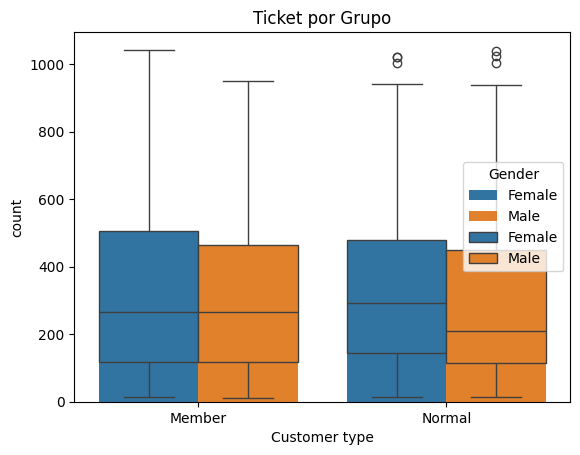

In [44]:
# Visualizações
sns.countplot(data=df, x='Customer type', hue='Gender')
plt.title('Distribuição Clientes')
plt.savefig('etapa4_clientes.png')

sns.boxplot(data=df, x='Customer type', y='Total', hue='Gender')
plt.title('Ticket por Grupo')
plt.savefig('etapa4_ticket.png')
plt.show()

In [45]:
# ========================================
# ETAPA 5: ANÁLISES FINAIS Supermarket
# ========================================

In [46]:
# FILIAIS (ticket + rating)
print("FILIAIS:")
df.groupby("Branch")[["Total", "gross income", "Rating"]].agg({
    "Total": ["mean", "sum"], 
    "gross income": "mean",
    "Rating": "mean"
}).round(2)

FILIAIS:


Total            gross income Rating
          mean        sum         mean   mean
Branch                                       
A       312.35  106200.37        14.87   7.03
B       319.87  106197.67        15.23   6.82
C       337.10  110568.71        16.05   7.07

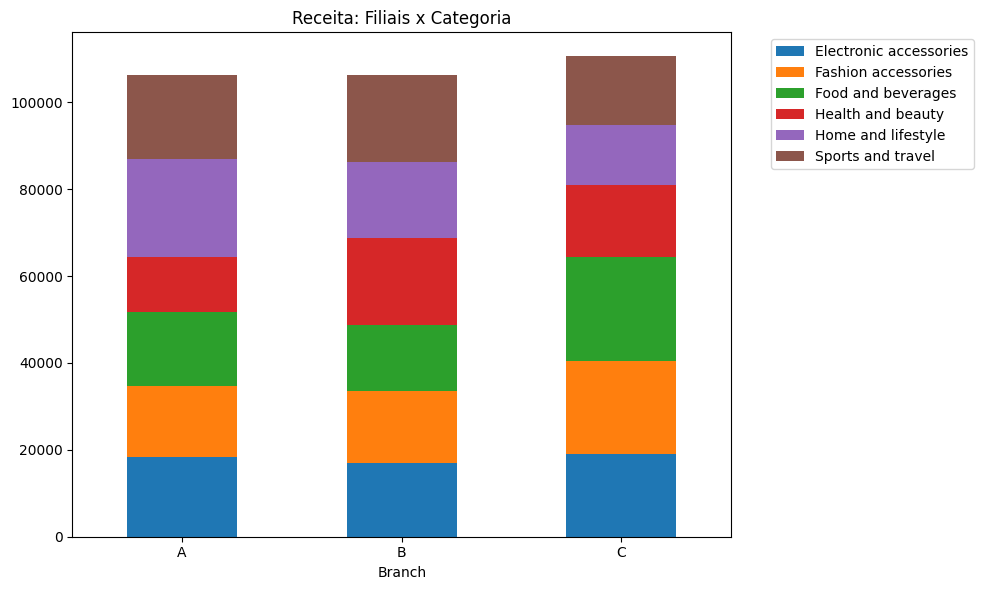

In [47]:
# FILIAIS x CATEGORIAS (stacked bar)
pivot = df.pivot_table(index="Branch", columns="Product line", 
                      values="Total", aggfunc="sum", fill_value=0)
pivot.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Receita: Filiais x Categoria")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("filial_categorias.png", dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# MARGEM por categoria (%)
df["margem"] = df["gross income"] / df["Total"]
margem_pct = df.groupby('Product line')['margem'].mean() * 100
print("MARGENS %:")
print(margem_pct.round(2).sort_values(ascending=False))

MARGENS %:
Product line
Electronic accessories    4.76
Fashion accessories       4.76
Food and beverages        4.76
Health and beauty         4.76
Home and lifestyle        4.76
Sports and travel         4.76
Name: margem, dtype: float64


In [49]:
# PAGAMENTOS
print(" PAGAMENTOS:")
df.groupby("Payment")["Total"].agg(["count", "mean", "sum"]).round(2)

 PAGAMENTOS:


,count,mean,sum
Payment,,,
Cash,344,326.18,112206.57
Credit card,311,324.01,100767.07
Ewallet,345,318.82,109993.11


In [ ]:
# SAZONALIDADE DIAS (24.1% insight!)
participacao = df.groupby('Dia_Semana')['Total'].sum() / df['Total'].sum() * 100
print("DIAS %:")
print(participacao.round(2).sort_values(ascending=False))
top2, low2 = participacao.nlargest(2).sum(), participacao.nsmallest(2).sum()
print(f"💡 Sáb+Ter: {top2:.1f}% | Seg+Qua: {low2:.1f}%")
print(f"   OPORTUNIDADE: +{((top2-low2)/low2*100):.1f}% nas baixas!")


DIAS %:
Dia_Semana
Saturday     17.38
Tuesday      15.94
Thursday     14.04
Sunday       13.77
Friday       13.60
Wednesday    13.54
Monday       11.73
Name: Total, dtype: float64
💡 Sáb+Terça: 33.3% | Seg+Qua: 25.3% das vendas
   OPORTUNIDADE: +31.8% se baixas = picos!
